# Trabajo de Grupo - KNN


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [90]:
#cargamos datos txt o csv
df = pd.read_csv('dataset.txt')
#df = pd.read_csv('dataset.csv')

names = df.iloc[0]
print(names)
# eliminamos la segunda fila de nombres porque ya existe una cabecera ID, X1, X2, ... Y
df = df.drop(0)

ID            ID
X1     LIMIT_BAL
X2           SEX
X3     EDUCATION
X4      MARRIAGE
X5           AGE
X6         PAY_0
X7         PAY_2
X8         PAY_3
X9         PAY_4
X10        PAY_5
X11        PAY_6
X12    BILL_AMT1
X13    BILL_AMT2
X14    BILL_AMT3
X15    BILL_AMT4
X16    BILL_AMT5
X17    BILL_AMT6
X18     PAY_AMT1
X19     PAY_AMT2
X20     PAY_AMT3
X21     PAY_AMT4
X22     PAY_AMT5
X23     PAY_AMT6
Y              Y
Name: 0, dtype: object


In [91]:
# Mostramos los datos despues de eliminar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a variables numericas.

In [92]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [93]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Paga deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-811,-2413,-689,0,0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,-957,957,590,183,-194,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,-15212,-468,772,617,601,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1243,1058,-20977,645,588,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2947,30165,-14895,-1794,-15,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividimos en entrenamiento(24,000), validacion(3,000), test (3,000)

In [0]:
# Dividir el conjunto en: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente para obtener una precision de 0.033% en validacion y test

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# usaremos random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)


In [95]:
# paetimos la dta en entrenamiento y validación
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape

((27000, 39),
 (24000, 39),
 (3000, 39),
 (3000, 39),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

# balanceando los datos

In [96]:
# Corregimos los datos desbalanceados
# Crear nuevo dataframe para entrenamiento con datos balanceados
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('datos desbalanceados=\n', balance,'\n\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('datos balanceados=\n', y_entren_os.value_counts())

datos desbalanceados=
 0    18674
1     5326
Name: Y, dtype: int64 

num muestras= 13348
datos balanceados=
 1    18674
0    18674
Name: Y, dtype: int64


# Función para aplicar raiz a los montos

In [0]:
# Función para aplicar a los datos (entrenamiento, validacion, test, entrenamiento_balanceado)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
sqrt_monto(X_entren_os_tr)
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

In [98]:
# Vemos las variables X12 ... X23 están transformadas.
X_entren_os_tr.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,3.734800e+04,3.734800e+04,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000
mean,152843.686409,1.588760,1.870729,1.543055,35.527043,0.230802,0.083699,0.030952,-0.037646,-0.099871,-0.136982,173.934560,169.859884,165.550726,158.369758,151.591700,147.450807,50.427930,49.616691,46.060418,43.419392,43.816699,43.851880,-1785.806389,-2.051228e+03,-3.384113e+03,-2790.887223,-1368.951537,0.450993,0.441284,0.422694,0.391008,0.362896,0.348714,0.412507,0.538550,0.386890,0.259532,0.387758
std,125808.679775,0.492065,0.766180,0.524234,9.458204,1.260833,1.342436,1.336077,1.326553,1.289817,1.300873,140.380634,139.090993,136.946681,133.043381,130.472848,130.056737,48.281460,50.238364,49.866915,47.921403,48.569440,51.912240,21264.523414,2.411812e+04,2.401210e+04,20746.752474,19734.794140,0.413467,0.408758,0.397097,0.376750,0.360580,0.356846,23.039858,34.629538,23.019372,1.028568,8.889424
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-393.666102,-264.153365,-396.565253,-412.310563,-285.191164,-388.526704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-470400.000000,-5.119400e+05,-1.542332e+06,-432730.000000,-446948.000000,-0.619892,-1.395540,-0.925082,-1.374500,-0.876743,-1.509530,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,60.131107,55.646203,52.478567,48.700616,41.689327,35.510562,19.748418,19.748418,13.747727,3.605551,1.414214,0.000000,-1625.000000,-1.924000e+03,-2.625000e+03,-2140.250000,-1253.000000,0.025381,0.020800,0.018840,0.016011,0.012000,0.008650,0.034744,0.031025,0.019688,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,148.323970,145.420081,142.179464,138.452158,135.585766,132.823191,44.721360,44.721360,38.729833,34.856850,36.138622,34.777866,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.392090,0.377071,0.349910,0.315519,0.277220,0.243512,0.055298,0.054235,0.044454,0.039937,0.041252
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,252.427216,247.644907,241.282511,228.230147,221.419286,219.731655,67.195610,65.574385,62.401922,59.160798,60.000000,59.160798,1482.250000,1.349000e+03,1.003000e+03,934.000000,1125.000000,0.853560,0.841989,0.807280,0.726379,0.664688,0.636897,0.256164,0.236574,0.168078,0.140152,0.177283
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,982.095209,991.932961,1289.995736,944.238317,962.897191,980.644686,934.640038,1297.790045,946.593894,788.035532,653.091877,727.094217,410261.000000,1.682177e+06,4.299810e+05,487241.000000,414369.000000,5.309500,5.456200,4.558050,4.645500,4.935500,2.694100,4444.333333,5001.000000,4444.333333,129.705128,690.655172


# Función para representar pagos como variables numericos y categoricales
# No ejecutar en KNN

In [0]:
# Construir varibles categorical y numerical por pagos.
cols_pago = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
cols_pago_cat = ['X6cat', 'X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
def cat_num_pago(X):
    for x in cols_pago:
        xcat = x+'cat'
        X[xcat] = X[x]
        X.loc[X[xcat]>0, xcat] = 1
        X[xcat] = X[xcat].astype('category')
        xnum = x+'num'
        X[xnum] = X[x]
        X.loc[X[xnum]<0, xnum] = 0
        
    
X_entren_os_tr_pago = X_entren_os_tr.copy()    
cat_num_pago(X_entren_os_tr_pago)
X_entren_os_tr_pago.drop(columns=cols_pago, inplace=True)

X_val_tr_pago = X_val_tr.copy()
cat_num_pago(X_val_tr_pago)
X_val_tr_pago.drop(columns=cols_pago, inplace=True)

# Preparar X_text_tr_pago tambien.
X_test_tr_pago = X_test_tr.copy()
cat_num_pago(X_test_tr_pago)
X_test_tr_pago.drop(columns=cols_pago, inplace=True)



#X_entren_os_tr = pd.get_dummies(X_entren_os_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_val_tr = pd.get_dummies(X_val_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_test_tr = pd.get_dummies(X_test_tr, prefix = cols_pago, columns=cols_pago_cat)

In [100]:
X_entren_os_tr_pago.head()
#X_val_tr_pago.head()
#X_test_tr_pago.head()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X6cat,X6num,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12044,20000,2,3,1,52,97.005155,108.811764,106.113147,106.113147,106.113147,0.000000,50.990195,0.000000,0.000000,0.000000,0.000000,0.000000,2430,-580,0,0,-11260,0.470500,0.592000,0.563000,0.563000,0.563000,0.000000,0.219595,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,2,0,0,0,0,0,0
9417,120000,2,2,1,40,330.755196,330.752173,191.963538,194.265283,195.910694,197.843372,62.449980,41.231056,38.729833,37.416574,37.416574,38.729833,-2,-72547,889,642,761,0.911658,0.911642,0.307083,0.314492,0.319842,0.326183,0.035650,0.046133,0.039747,0.036476,0.035767,0,0,0,0,0,0,0,0,0,0,0,0
1634,80000,2,1,2,38,43.897608,21.118712,30.149627,41.713307,46.797436,22.759613,21.118712,30.149627,41.713307,46.797436,22.759613,71.147734,-1481,463,831,450,-1672,0.024088,0.005575,0.011362,0.021750,0.027375,0.006475,1.000000,1.000000,1.000000,1.000000,1.000000,-2,0,-2,0,-2,0,-2,0,-2,0,-2,0
10873,480000,2,3,1,42,85.117566,0.000000,0.000000,0.000000,28.106939,0.000000,0.000000,0.000000,0.000000,28.106939,0.000000,0.000000,-7245,0,0,790,-790,0.015094,0.000000,0.000000,0.000000,0.001646,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2,0,-2,0,-2,0,-2,0,-2,0,-2,0
9945,20000,1,2,2,33,132.056806,136.007353,146.065054,182.337599,131.381125,132.668760,36.606010,56.364883,0.000000,39.319207,27.856777,25.416530,1059,2837,11912,-15986,340,0.871950,0.924900,1.066750,1.662350,0.863050,0.880050,0.072440,0.148910,0.000000,0.089566,0.044088,0,0,0,0,0,0,1,2,0,0,0,0


## Funcion de costo adaptada

In [0]:
# Función de costo y exactitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # referencia: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # podemos calcular algunas medidas.
    # Coeficientes de costo.
    cTP = 0; cFN = 5; cFP = 1; cTN = 0 #cambiee EMR
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)

## Mostar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [0]:
# funcion para estimar la probabilidad empirica
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# graficamos
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirica x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirica")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combinamos ambas funciones
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



# **Balanceamos entren+val para usar entrenamiento y test**

In [103]:
## corregimos desbalanceo 
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: datos desbalanceados=\n', balance,'\n\nmuestra=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: datos balanceados=\n', y_entrenval_os.value_counts())

# Preparamos tambien X_entrenval_os_tr
X_entrenval_os_tr = X_entrenval_os.copy()
sqrt_monto(X_entrenval_os_tr)

# Preparar tambien X_entrenval_os_tr_pago .
X_entrenval_os_tr_pago = X_entrenval_os_tr.copy()
cat_num_pago(X_entrenval_os_tr_pago)
X_entrenval_os_tr_pago.drop(columns=cols_pago, inplace=True)

entran+val: datos desbalanceados=
 0    20993
1     6007
Name: Y, dtype: int64 

muestra= 14986
entren+val: datos balanceados=
 1    20993
0    20993
Name: Y, dtype: int64


## KNN 
### Sin oversampling


Entrenamiento
Exactitud:     0.8159166666666666
Precisión:     0.6649709302325582
Exhaustividad: 0.34359744648892226
AUC:           0.6471119930313305
Costo por cliente: 0.76675

Validacion
Exactitud:     0.745
Precisión:     0.37116564417177916
Exhaustividad: 0.1776798825256975
AUC:           0.5446398550187781
Costo por cliente: 1.0016666666666667



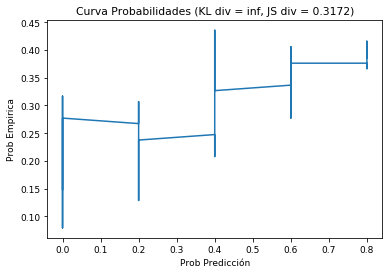

In [104]:
# Usamos KNN
# Caso simple sin ajuste con parametros por defecto.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_entren, y_entren)


#mostramos las medidas de calidad, incluyendo la función de costo
print('\nEntrenamiento')
custom_cost(knn, X_entren, y_entren)
print('\nValidacion')
custom_cost(knn, X_val, y_val)
print()
#mostramos probabilidades
y_val_prob = knn.predict_proba(X_val)[:,1]
mostrarPQ(y_val, y_val_prob)

# Busqueda del paramero K Optimo en KNN

In [0]:
# Función para buscar el mejor costo.
import sys
from sklearn.neighbors import KNeighborsClassifier

def imprimirCalidad(calidad):
    print('Exactitud:    ',  calidad.accuracy)
    print('Precisión:    ', calidad.precision)
    print('Exhaustividad:', calidad.recall)
    print('AUC:          ', calidad.AUC)
    print('Costo por cliente:', calidad.cost)


def mejorKNN(X_entren, y_entren, X_val, y_val,
                 n_neighbors_list=[20], printdetail=False):
    
    _cost = sys.float_info.max
    
    for n_neighbors in n_neighbors_list:
        miKNN = KNeighborsClassifier(n_neighbors = n_neighbors, weights='distance')
        miKNN.fit(X_entren, y_entren)

        if printdetail:
            print('\n* Parametro *')
            print('n_neighbors =', n_neighbors)
            print('\nEntrenamiento')
            entren_cost = custom_cost(miKNN, X_entren, y_entren, True)
            print('\nValidacion')
            val_cost = custom_cost(miKNN, X_val, y_val, True)
        else:
            entren_cost = custom_cost(miKNN, X_entren, y_entren, False)
            val_cost = custom_cost(miKNN, X_val, y_val, False)

        if _cost > val_cost.cost:
            _cost = val_cost.cost
            _n_neighbors = n_neighbors
            _entren_cost = entren_cost
            _val_cost = val_cost
            _miKNN = miKNN

    print('\n*** Mejor Resultado ***')
    print('\nParametro:')
    print('n_neighbors =', _n_neighbors)
    print('\nEntrenamiento')
    imprimirCalidad(_entren_cost)
    print('\nValidacion')
    imprimirCalidad(_val_cost)

    print('\nProbabilidad de no pago')
    y_val_prob = _miKNN.predict_proba(X_val)[:,1] 
    mostrarPQ(y_val, y_val_prob)


*** Mejor Resultado ***

Parametro:
n_neighbors = 4

Entrenamiento
Exactitud:     0.9994583333333333
Precisión:     0.9998118532455316
Exhaustividad: 0.9977469019902365
AUC:           0.9988466757996594
Costo por cliente: 0.0025416666666666665

Validacion
Exactitud:     0.728
Precisión:     0.3433874709976798
Exhaustividad: 0.2173274596182085
AUC:           0.5476460497746065
Costo por cliente: 0.9826666666666667

Probabilidad de no pago


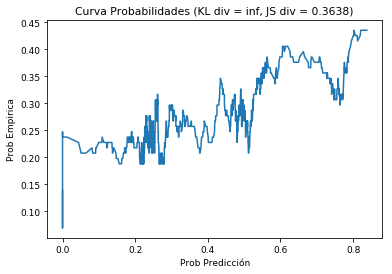

In [106]:
# buscamos el mejor parametro para el modelo KNN.
mejorKNN(X_entren, y_entren, X_val, y_val, 
             n_neighbors_list=[3,4,5,6,7,8,9,10],#,15,20,50, 100], 
             printdetail=False)

### Over Sampling


Entrenamiento
Exactitud:     0.9995180464817394
Precisión:     0.9994110718492344
Exhaustividad: 0.999625147263575
AUC:           0.9995180464817394
Costo por cliente: 0.001231658991110635

Validacion
Exactitud:     0.6226666666666667
Precisión:     0.2821256038647343
Exhaustividad: 0.4287812041116006
AUC:           0.554192240693144
Costo por cliente: 0.896

Probabilidad de no pago


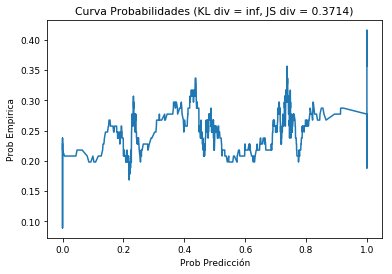

In [107]:
# probar data balanciada.
from sklearn.neighbors import KNeighborsClassifier

#utilizaremos X e y de entrenamiento 
knn_b = KNeighborsClassifier(n_neighbors = 4, weights='distance')
knn_b.fit(X_entren_os, y_entren_os)

print('\nEntrenamiento')
custom_cost(knn_b, X_entren_os, y_entren_os, True)
print('\nValidacion')
custom_cost(knn_b, X_val, y_val, True)
print('\nProbabilidad de no pago')
y_val_prob = knn_b.predict_proba(X_val)[:,1] 
mostrarPQ(y_val, y_val_prob)



Entrenamiento
Exactitud:     0.9995448216771983
Precisión:     0.9994111033781252
Exhaustividad: 0.9996786976544929
AUC:           0.9995448216771983
Costo por cliente: 0.0010977830138160008

Validacion
Exactitud:     0.6213333333333333
Precisión:     0.27674190382728164
Exhaustividad: 0.41409691629955947
AUC:           0.5481437578479256
Costo por cliente: 0.9106666666666666

Probabilidad de no pago


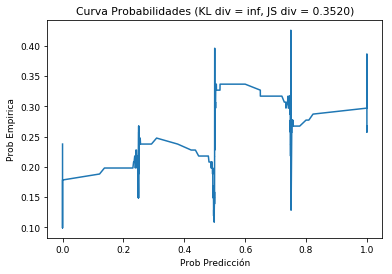

In [108]:
# probar el modelo con los datos balanceados y raiz de los montos.
from sklearn.neighbors import KNeighborsClassifier

knn_b = KNeighborsClassifier(n_neighbors = 4, weights='distance')
knn_b.fit(X_entren_os_tr, y_entren_os)

print('\nEntrenamiento')
custom_cost(knn_b, X_entren_os_tr, y_entren_os, True)
print('\nValidacion')
custom_cost(knn_b, X_val_tr, y_val, True)
print('\nProbabilidad de no pago')
y_val_prob = knn_b.predict_proba(X_val)[:,1]
mostrarPQ(y_val, y_val_prob)

In [109]:
#no correr en KNN

# Convertir los variables categoricals al numericos.
catlist = ['X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
for c in catlist:
    X_entren_os_tr_pago[c] = X_entren_os_tr_pago[c].astype('int64')
    X_val_tr_pago[c] = X_val_tr_pago[c].astype('int64')
    X_test_tr_pago[c] = X_test_tr_pago[c].astype('int64')

X_entren_os_tr_pago.describe()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X6num,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
count,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,3.734800e+04,3.734800e+04,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000,37348.000000
mean,152843.686409,1.588760,1.870729,1.543055,35.527043,173.934560,169.859884,165.550726,158.369758,151.591700,147.450807,50.427930,49.616691,46.060418,43.419392,43.816699,43.851880,-1785.806389,-2.051228e+03,-3.384113e+03,-2790.887223,-1368.951537,0.450993,0.441284,0.422694,0.391008,0.362896,0.348714,0.412507,0.538550,0.386890,0.259532,0.387758,0.558129,-0.184347,0.498313,-0.218539,0.461042,-0.261701,0.403663,-0.297258,0.352013,-0.331638,0.349657
std,125808.679775,0.492065,0.766180,0.524234,9.458204,140.380634,139.090993,136.946681,133.043381,130.472848,130.056737,48.281460,50.238364,49.866915,47.921403,48.569440,51.912240,21264.523414,2.411812e+04,2.401210e+04,20746.752474,19734.794140,0.413467,0.408758,0.397097,0.376750,0.360580,0.356846,23.039858,34.629538,23.019372,1.028568,8.889424,0.920324,0.920862,0.953478,0.922583,0.941345,0.909310,0.939410,0.898493,0.899256,0.918920,0.888468
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-393.666102,-264.153365,-396.565253,-412.310563,-285.191164,-388.526704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-470400.000000,-5.119400e+05,-1.542332e+06,-432730.000000,-446948.000000,-0.619892,-1.395540,-0.925082,-1.374500,-0.876743,-1.509530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,60.131107,55.646203,52.478567,48.700616,41.689327,35.510562,19.748418,19.748418,13.747727,3.605551,1.414214,0.000000,-1625.000000,-1.924000e+03,-2.625000e+03,-2140.250000,-1253.000000,0.025381,0.020800,0.018840,0.016011,0.012000,0.008650,0.034744,0.031025,0.019688,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,148.323970,145.420081,142.179464,138.452158,135.585766,132.823191,44.721360,44.721360,38.729833,34.856850,36.138622,34.777866,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.392090,0.377071,0.349910,0.315519,0.277220,0.243512,0.055298,0.054235,0.044454,0.039937,0.041252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,252.427216,247.644907,241.282511,228.230147,221.419286,219.731655,67.195610,65.574385,62.401922,59.160798,60.000000,59.160798,1482.250000,1.349000e+03,1.003000e+03,934.000000,1125.000000,0.853560,0.841989,0.807280,0.726379,0.664688,0.636897,0.256164,0.236574,0.168078,0.140152,0.177283,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,982.095209,991.932961,1289.995736,944.238317,962.897191,980.644686,934.640038,1297.790045,946.593894,788.035532,653.091877,727.094217,410261.000000,1.682177e+06,4.299810e+05,487241.000000,414369.000000,5.309500,5.456200,4.558050,4.645500,4.935500,2.694100,4444.333333,5001.000000,4444.333333,129.705128,690.655172,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000



Entrenamiento
Exactitud:     0.9995448216771983
Precisión:     0.9994111033781252
Exhaustividad: 0.9996786976544929
AUC:           0.9995448216771983
Costo por cliente: 0.0010977830138160008

Validacion
Exactitud:     0.6213333333333333
Precisión:     0.27674190382728164
Exhaustividad: 0.41409691629955947
AUC:           0.5481437578479256
Costo por cliente: 0.9106666666666666

Probabilidad de no pagar


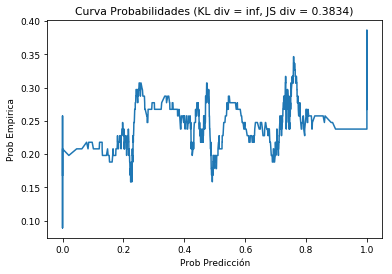

In [110]:
# probamos KNN con data balanceada,  con raiz de montos y datos categoricos separado.

#KNN:
from sklearn.neighbors import KNeighborsClassifier

#utilizaremos X e y de tren. 
knn_b = KNeighborsClassifier(n_neighbors = 4, weights='distance')
knn_b.fit(X_entren_os_tr_pago, y_entren_os)

print('\nEntrenamiento')
custom_cost(knn_b, X_entren_os_tr_pago, y_entren_os, True)
print('\nValidacion')
custom_cost(knn_b, X_val_tr_pago, y_val, True)
print('\nProbabilidad de no pagar')
y_val_prob = knn_b.predict_proba(X_val_tr_pago)[:,1] 
mostrarPQ(y_val, y_val_prob)

## Busqueda del mejor KNN - con oversampling


*** Mejor Resultado ***

Parametro:
n_neighbors = 19

Entrenamiento
Exactitud:     0.9995983720681161
Precisión:     0.9993042547497993
Exhaustividad: 0.9998928992181643
AUC:           0.9995983720681162
Costo por cliente: 0.0006158294955553175

Validacion
Exactitud:     0.6143333333333333
Precisión:     0.3105095541401274
Exhaustividad: 0.5726872246696035
AUC:           0.599625199225703
Costo por cliente: 0.7736666666666666

Probabilidad de no pago


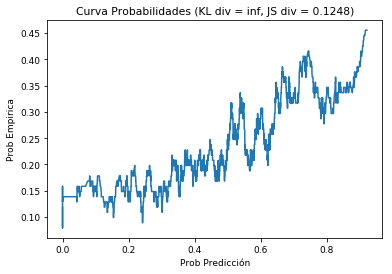

In [111]:
# encontramos el modelo con mejor parámetro 
mejorKNN(X_entren_os, y_entren_os, X_val, y_val, 
             n_neighbors_list=[1,3,5,7,9,11,13,15,17,19], 
             printdetail=False)

In [112]:
#uso de KNN:
from sklearn.neighbors import KNeighborsClassifier

#utilizaremos X e y de tren. 
knn_b = KNeighborsClassifier(n_neighbors = 19, weights='distance')
knn_b.fit(X_entren, y_entren)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='distance')

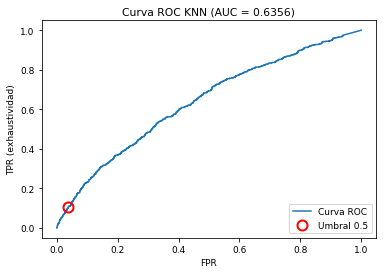

In [113]:
from sklearn import metrics

y_pred_val_knn = knn_b.predict_proba(X_val)[:,1]
fpr, tpr, umbrales = metrics.roc_curve(y_val, y_pred_val_knn)
auc_roc_knn = metrics.roc_auc_score(y_val, y_pred_val_knn)

plt.rcParams.update({'font.size': 9})
plt.plot(fpr, tpr, label= ("Curva ROC") )
plt.xlabel("FPR")
plt.ylabel("TPR (exhaustividad)")
plt.title(("Curva ROC KNN (AUC = %.4f)" % auc_roc_knn))
# ubicamos el punto más cercano a 0.5
umbral_05 = np.argmin(np.abs(umbrales - 0.5))
plt.plot(fpr[umbral_05], tpr[umbral_05], 'o', markersize=10,
         label="Umbral 0.5", fillstyle="none", c='r', mew=2)
plt.legend(loc=4, numpoints=1)